You are given the python code BBN Alarm.py that

(1) defines the alarm network from
the lectures extended with the RadioReport variable

(2) visualizes the structure of the net-
work, and the

(3) queries the network to calculate the conditional probability distribution
P(Earthquake|JohnCalls = T, MaryCalls = T). False values are coded with zeroes and
True values with Ones. The inference is calculated using the variable elimination method.

In [2]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
import pickle
import networkx as nx
import matplotlib.pyplot as plt

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
# Step 1: Define the structure of the Bayesian Network
model = BayesianNetwork([("Burglary",'Alarm'),
                         ('Earthquake', 'Alarm'),
                         ('Earthquake', 'RadioReport'),
                         ('Alarm', 'JohnCalls'),
                         ('Alarm', 'MaryCalls')])

# Step 2: Define the parameters (CPDs) of the Bayesian Network
cpd_Burglary = TabularCPD(variable='Burglary', variable_card=2, values=[[0.999], [0.001]])
cpd_Earthquake = TabularCPD(variable='Earthquake', variable_card=2, values=[[0.998], [0.002]])
cpd_Alarm = TabularCPD(variable='Alarm', variable_card=2, values=[[0.999, 0.71, 0.06, 0.05],[0.001, 0.29, 0.94, 0.95]],
                       evidence=['Burglary', 'Earthquake'], evidence_card=[2, 2])
cpd_RadioReport = TabularCPD(variable='RadioReport', variable_card=2, values=[[0.95, 0.01], [0.05, 0.99]],
                             evidence=['Earthquake'], evidence_card=[2])
cpd_JohnCalls = TabularCPD(variable='JohnCalls', variable_card=2, values=[[0.95, 0.1], [0.05, 0.9]],
                             evidence=['Alarm'], evidence_card=[2])
cpd_MaryCalls = TabularCPD(variable='MaryCalls', variable_card=2, values=[[0.99, 0.3], [0.01, 0.7]],
                             evidence=['Alarm'], evidence_card=[2])

In [4]:
# Step 3: Add the parameters to the model
model.add_cpds(cpd_Burglary, cpd_Earthquake, cpd_Alarm, cpd_RadioReport, cpd_JohnCalls, cpd_MaryCalls)

# Step 4: Validate the model
assert model.check_model()

In [5]:
# Step 1: Store model
with open('bayesian_network_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [6]:
# Step 2: Load model
with open('bayesian_network_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

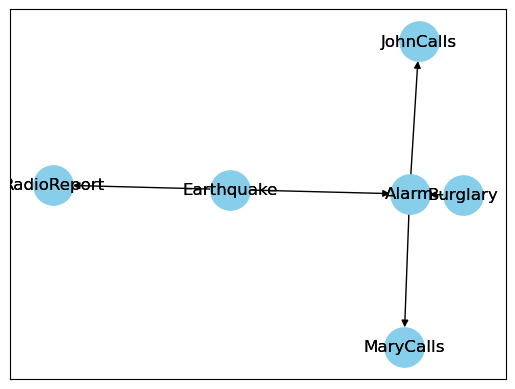

In [7]:
# Visualize the Bayesian Network
G = nx.DiGraph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=800, node_color='skyblue')
nx.draw_networkx_labels(G, pos)
plt.show()

Please modify the code so that it is able to calculate:
- P (Earthquake|JohnCalls = T, M aryCalls = T, RadioReport = T )
- P (Earthquake|JohnCalls = T, M aryCalls = F, RadioReport = T )
- P (Burlary|JohnCalls = T, M aryCalls = T, RadioReport = F )
- P (Burlary|JohnCalls = F, M aryCalls = T, RadioReport = T )
- P (JohnCalls)
- P (JohnCalls|Radioreport = T )
- P (JohnCalls|Radioreport = F )
- P (JohnCalls|M aryCalls = T )

In [16]:
# variable elimination algorithm

# Step 1: Initialize the Variable Elimination method
ve_infer = VariableElimination(model)

# Step 2: Query the Bayesian Network to find the conditional probability of 'Earthquake' given that 'JohnCalls is True and MaryCall is True
results = [
    ve_infer.query(variables=['Earthquake'], evidence={"JohnCalls":1, "MaryCalls":1, "RadioReport":1}),
    ve_infer.query(variables=['Earthquake'], evidence={"JohnCalls":1, "MaryCalls":0, "RadioReport":1}),
    ve_infer.query(variables=['Burglary'], evidence={'JohnCalls':1, 'MaryCalls':1, 'RadioReport': 0}),
    ve_infer.query(variables=['Burglary'], evidence={'JohnCalls':0, 'MaryCalls':1, 'RadioReport': 1}),
    ve_infer.query(variables=['JohnCalls']),
    ve_infer.query(variables=['JohnCalls'], evidence={'RadioReport':1}),
    ve_infer.query(variables=['JohnCalls'], evidence={'RadioReport':0}),
    ve_infer.query(variables=['JohnCalls'], evidence={'MaryCalls':1}),
]

for r in results:
    print(r)
    print("")

+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.1912 |
+---------------+-------------------+
| Earthquake(1) |            0.8088 |
+---------------+-------------------+

+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.9172 |
+---------------+-------------------+
| Earthquake(1) |            0.0828 |
+---------------+-------------------+

+-------------+-----------------+
| Burglary    |   phi(Burglary) |
+=============+=================+
| Burglary(0) |          0.6566 |
+-------------+-----------------+
| Burglary(1) |          0.3434 |
+-------------+-----------------+

+-------------+-----------------+
| Burglary    |   phi(Burglary) |
+=============+=================+
| Burglary(0) |          0.9935 |
+-------------+-----------------+
| Burglary(1) |          0.0065 |
+-------------+--------